In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

In [221]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib import style
style.use('seaborn-notebook')
import macpy.utils.ngc_utils as ngcu

In [229]:
df_raw = pd.read_csv('data_TOYOTA.csv')
# df_raw = pd.read_csv('data_DAIGR.csv')
# df_raw = pd.read_csv('data_GT.csv')

In [230]:
df = df_raw.set_index('TradeDate')

In [231]:
df_catell = df[df['category'] == 'll']
df_catelc = df[df['category'] == 'lc']
df_catew = df[df['category'] == 'w']

In [232]:
# normalized weight
w = df_catew.loc[:,'Quote'] / df_catew.loc[:, 'SumAmtOutstanding']
df_catew.loc[:,'Quote'] = w.values

In [233]:
#s_combine_(t) = (1-alpha)*s_l(t) + alpha*s_c(t)
alpha = 0.01
df_comb_ = df_catell.copy()
df_comb_ = df_comb_.replace('ll', 'combine')
df_comb_['Quote'] = (1 - alpha) * df_catell['Quote'] + alpha * df_catelc['Quote']

In [234]:
tmp = df_comb_[['TenorEnum','Quote']]
tmp1 = tmp.reset_index().set_index(['TenorEnum','TradeDate']) #multiindex
df_comb = tmp1.unstack(0) #ts; 23 col(term)

In [235]:
#unstacked ll (get 1st day level value)
tmp2 = df_catell[['TenorEnum','Quote']]
tmp3 = tmp2.reset_index().set_index(['TenorEnum','TradeDate'])
level = tmp3.unstack(0)
#set 1st day value to (1-alpha)*s_l(1) + alpha*s_c(1) + alpha*s_l(1)
df_comb.iloc[0, :]  = df_comb.iloc[0, :] + alpha * level.iloc[0, :]

In [236]:
# comb(t) = (1-alpha)*s_l(t) + alpha*s_c(t) + alpha * comb(t-1) 
for i in range(1, len(df_comb)):
    df_comb.iloc[i,:] = df_comb.iloc[i,:] + alpha * df_comb.iloc[(i-1),:]

In [237]:
#mExp combined spread
mExp = pd.DataFrame(ngcu.mExp(df_comb),index=df_comb.index,columns=df_comb.columns)

In [238]:
#w
tmp4 = df_catew[['TenorEnum','Quote']]
tmp5 = tmp4.reset_index().set_index(['TenorEnum','TradeDate']) #multiindex
weights = tmp5.unstack(0)

In [239]:
#s_bar
weighted_average = mExp * weights
sbar_ = weighted_average.sum(1)

In [240]:
# return series
r = np.diff(ngcu.mLog(sbar_))
sbar = pd.DataFrame(sbar_[1:], columns = ['WeightedAverage'])
sbar['Return'] = r

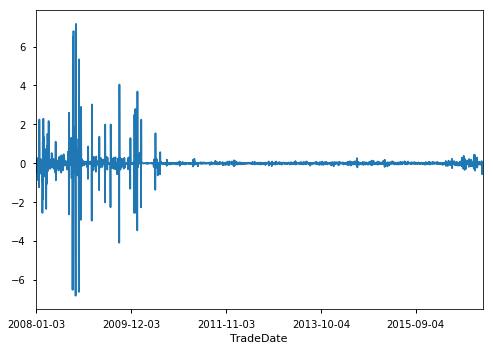

In [241]:
sbar['Return'].plot()

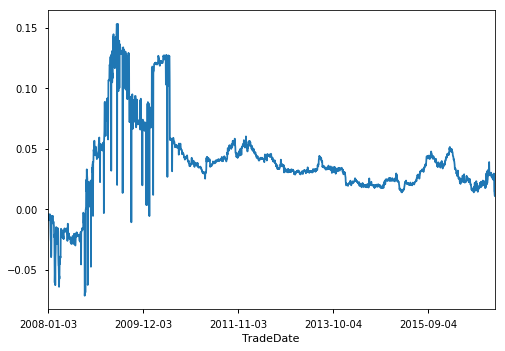

In [242]:
sbar['WeightedAverage'].plot()

In [273]:
data = [go.Scatter(x=sbar.index, y=sbar.WeightedAverage)]

In [274]:
py.iplot(data)

Error: [('system library', 'fopen', 'No such file or directory'), ('BIO routines', 'BIO_new_file', 'no such file'), ('x509 certificate routines', 'X509_load_cert_crl_file', 'system lib')]

In [265]:
!pip install plotly --upgrade

Requirement already up-to-date: plotly in c:\users\lyang\anaconda2\lib\site-packages
Requirement already up-to-date: decorator>=4.0.6 in c:\users\lyang\anaconda2\lib\site-packages (from plotly)
Requirement already up-to-date: six in c:\users\lyang\anaconda2\lib\site-packages (from plotly)
Requirement already up-to-date: enum34; python_version == "2.7" in c:\users\lyang\anaconda2\lib\site-packages (from traitlets>=4.1->nbformat>=4.2->plotly)
Requirement already up-to-date: functools32; python_version == "2.7" in c:\users\lyang\anaconda2\lib\site-packages (from jsonschema!=2.5.0,>=2.4->nbformat>=4.2->plotly)
  Found existing installation: idna 2.2
    Uninstalling idna-2.2:
      Successfully uninstalled idna-2.2
  Found existing installation: chardet 2.3.0
    Uninstalling chardet-2.3.0:
      Successfully uninstalled chardet-2.3.0
  Found existing installation: requests 2.12.4
    Uninstalling requests-2.12.4:
      Successfully uninstalled requests-2.12.4
  Found existing installation

    DEPRECATION: Uninstalling a distutils installed project (pytz) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    DEPRECATION: Uninstalling a distutils installed project (ipython-genutils) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    DEPRECATION: Uninstalling a distutils installed project (traitlets) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    DEPRECATION: Uninstalling a distutils installed project (jupyter-core) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    DEPRECATION: Uninstalling a distutils i

In [277]:
import plotly 
plotly.tools.set_credentials_file(username='LillianY', api_key='DdJxuB7Pa135llrJhuxh')

In [267]:
import plotly 
plotly.tools.set_config_file(world_readable=False,
                             sharing='private')

In [270]:
import plotly.plotly as py
from plotly.graph_objs import *

In [271]:
help(py.plot)

Help on function plot in module plotly.plotly.plotly:

plot(figure_or_data, validate=True, **plot_options)
    Create a unique url for this plot in Plotly and optionally open url.
    
    plot_options keyword agruments:
    filename (string) -- the name that will be associated with this figure
    fileopt ('new' | 'overwrite' | 'extend' | 'append') -- 'new' creates a
        'new': create a new, unique url for this plot
        'overwrite': overwrite the file associated with `filename` with this
        'extend': add additional numbers (data) to existing traces
        'append': add additional traces to existing data lists
    auto_open (default=True) -- Toggle browser options
        True: open this plot in a new browser tab
        False: do not open plot in the browser, but do return the unique url
    sharing ('public' | 'private' | 'secret') -- Toggle who can view this
                                                  graph
        - 'public': Anyone can view this graph. It will 

In [272]:
import plotly.tools as tls
tls.embed('https://plot.ly/~cufflinks/8')